# 1. Задание

Предположим, в ряде городов в определенный период проведен тест:  
- В тестовых городах на веб-сайте пиццы располагаются по популярности  
- Во всех остальных по увеличению цены на пиццу  

Тестовый период: 7 апреля - 19 мая  
Тестовые города: Пенза, Уфа, Курск, Нижний Тагил, Новокуйбышевск, Орск  
Описание датасета:  
- Date : дата  
- CityName : город  
- OrderSource : источник заказа - mp: мобильное приложение, web: веб-сайт, other - другое  
- Category: категория товара  
- rto: выручка после скидок  
- rto_do: выручка до скидок
- cost: затраты на себестоимость товаров
- tickets: кол-во заказов
- qty - кол-во продуктов
- clients_qty - уникальное кол-во клиентов
- avg_time - среднее время сессии (только по тем, кто оформил заказ)
- avg_price - средняя цена  
! В исходном датасете данные уже сгруппированы по Date, CityName, OrderSource, Category

# 2. Предобработка данных

In [53]:
import pandas as pd

In [54]:
data = pd.read_csv('sources/DA_DODO.csv')

In [55]:
data.head(10)

,Date,CityName,OrderSource,Category,rto,rto_do,cost,qty,tickets,clients_qty,avg_time,avg_price
0,2022-01-01T00:00:00.000Z,Абакан,mp,пицца,76674.8416,83162.76,19535.963036,165.0,108.0,102.0,31.504625,464.696010
1,2022-01-01T00:00:00.000Z,Абакан,mp,закуски,12099.1584,12950.67,4141.103464,69.0,40.0,37.0,40.269234,175.350122
2,2022-01-01T00:00:00.000Z,Абакан,mp,напитки,1718.3600,2533.80,854.599275,22.0,19.0,18.0,28.066464,78.107273
3,2022-01-01T00:00:00.000Z,Абакан,mp,десерты,4614.8200,5498.10,1668.686400,27.0,22.0,22.0,25.731966,170.919259
4,2022-01-01T00:00:00.000Z,Абакан,other,пицца,24587.7800,25875.51,5532.266261,47.0,24.0,23.0,18.486525,523.144255
5,2022-01-01T00:00:00.000Z,Абакан,other,закуски,2890.5100,2987.67,862.327004,15.0,5.0,5.0,40.636090,192.700667
6,2022-01-01T00:00:00.000Z,Абакан,other,напитки,141.6100,146.37,82.220400,1.0,1.0,1.0,36.858792,141.610000
7,2022-01-01T00:00:00.000Z,Абакан,web,пицца,39132.1742,41191.47,9358.496118,69.0,45.0,43.0,32.470000,567.132959
8,2022-01-01T00:00:00.000Z,Абакан,web,закуски,5028.9400,5197.98,1744.257134,19.0,10.0,10.0,36.292530,264.681053
9,2022-01-01T00:00:00.000Z,Абакан,web,напитки,704.4800,728.16,238.041765,5.0,5.0,5.0,48.440940,140.896000


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550710 entries, 0 to 550709
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         550710 non-null  object 
 1   CityName     550710 non-null  object 
 2   OrderSource  550710 non-null  object 
 3   Category     550710 non-null  object 
 4   rto          550710 non-null  float64
 5   rto_do       550710 non-null  float64
 6   cost         550710 non-null  float64
 7   qty          550710 non-null  float64
 8   tickets      550710 non-null  float64
 9   clients_qty  550710 non-null  float64
 10  avg_time     550710 non-null  float64
 11  avg_price    550710 non-null  float64
dtypes: float64(8), object(4)
memory usage: 50.4+ MB


In [57]:
data.columns = data.columns.str.lower()

In [58]:
data['date'] = pd.to_datetime(data['date'])

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550710 entries, 0 to 550709
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   date         550710 non-null  datetime64[ns, UTC]
 1   cityname     550710 non-null  object             
 2   ordersource  550710 non-null  object             
 3   category     550710 non-null  object             
 4   rto          550710 non-null  float64            
 5   rto_do       550710 non-null  float64            
 6   cost         550710 non-null  float64            
 7   qty          550710 non-null  float64            
 8   tickets      550710 non-null  float64            
 9   clients_qty  550710 non-null  float64            
 10  avg_time     550710 non-null  float64            
 11  avg_price    550710 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 50.4+ MB


In [60]:
data.duplicated().any()

False

In [61]:
data['cityname'].unique()   

array(['Абакан', 'Абинск', 'Азов', 'Аксай Россия', 'Александров',
       'Альметьевск', 'Анапа', 'Апатиты', 'Апрелевка', 'Арзамас',
       'Архангельск', 'Астрахань', 'Балаково', 'Балашиха', 'Балтийск',
       'Барнаул', 'Батайск', 'Белгород', 'Белогорск', 'Бердск',
       'Березники', 'Благовещенск', 'Братск', 'Брянск', 'Бугульма',
       'Бузулук', 'Великий Новгород', 'Верхняя Пышма', 'Видное',
       'Владивосток', 'Владикавказ', 'Владимир', 'Внуково', 'Волгоград',
       'Волжский', 'Вологда', 'Волхов', 'Воркута', 'Воронеж',
       'Воскресенск', 'Воткинск', 'Всеволожск', 'Выборг',
       'Вышний Волочек', 'Вязьма', 'Гатчина', 'Геленджик', 'Глазов',
       'Голицыно', 'Горно-Алтайск', 'Горячий Ключ', 'Грозный', 'Губкин',
       'Губкинский', 'Дедовск', 'Дзержинск', 'Димитровград', 'Дмитров',
       'Долгопрудный', 'Домодедово', 'Дубна', 'Егорьевск', 'Екатеринбург',
       'Елабуга', 'Ессентуки', 'Железнодорожный', 'Жуковский', 'Заречный',
       'Звенигород', 'Зеленоград', 'Златоус

In [62]:
data['date'].min(), data['date'].max()

(Timestamp('2022-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2022-06-30 00:00:00+0000', tz='UTC'))

In [63]:
data = data[(data['ordersource'] == 'web') & (data['category'] == 'пицца')]

In [76]:
# Задаем даты
start_date = pd.to_datetime('2022-04-07', utc=True)
end_date = pd.to_datetime('2022-05-19', utc=True)

# Рассчитываем количество недель (только целые недели)
days = (end_date - start_date)

days

Timedelta('42 days 00:00:00')

Эксперимент длился 6 недель. Для A/A-теста подготовим также предпериод на 6 недель.

In [77]:
# Вычитаем 6 недель
AA_start_date = start_date - pd.Timedelta(weeks=6)

AA_start_date

Timestamp('2022-02-24 00:00:00+0000', tz='UTC')

# 3. Выбор метрик и формулирование гипотез

In [78]:
data[data['rto'] == 0]

,date,cityname,ordersource,category,rto,rto_do,cost,qty,tickets,clients_qty,avg_time,avg_price,arpu
82045,2022-01-28 00:00:00+00:00,Вышний Волочек,web,пицца,0.0,461.25,96.093210,1.0,1.0,1.0,29.871116,0.0,0.0
179956,2022-03-01 00:00:00+00:00,Копейск,web,пицца,0.0,1033.20,256.512890,1.0,1.0,1.0,29.036931,0.0,0.0
326914,2022-04-18 00:00:00+00:00,Прокопьевск,web,пицца,0.0,982.77,263.560761,1.0,1.0,1.0,25.373970,0.0,0.0
399377,2022-05-12 00:00:00+00:00,Лабытнанги,web,пицца,0.0,416.97,91.501432,1.0,1.0,1.0,28.046854,0.0,0.0


ARPU (Average Revenue per User) - средний доход на пользователя  
ARPU = общая сумма заказов пользователей / кол-во пользователей

H<sub>0</sub>: ARPU<sub>test</sub> = ARPU<sub>control</sub>  
H<sub>1</sub>: ARPU<sub>test</sub> &ne; ARPU<sub>control</sub> 

# 4. Разделение на контрольную и тестовую выборку

In [ ]:
data['arpu'] = data['rto']/data['clients_qty']

AA_data = data[(data['date'] >= AA_start_date) & (data['date'] < start_date)]
data = data[(data['date'] >= start_date) & (data['date'] < end_date)]

test_cities = ['Пенза', 'Уфа', 'Курск', 'Нижний Тагил', 'Новокуйбышевск', 'Орск']
test_data = data[data['cityname'].isin(test_cities)]
control_data = data[~data['cityname'].isin(test_cities)]

# 5. Проверка данных на нормальность

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [81]:
def analyze_distribution(data, data_name):

    # 1. Гистограмма
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    plt.hist(data, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Гистограмма {data_name}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')

    # 2. Q-Q Plot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    stats.probplot(data, dist="norm", plot=plt)  # Using scipy.stats.probplot
    plt.title(f'Q-Q Plot {data_name}')

    plt.tight_layout()  # Adjusts subplot parameters for a tight layout
    plt.show()


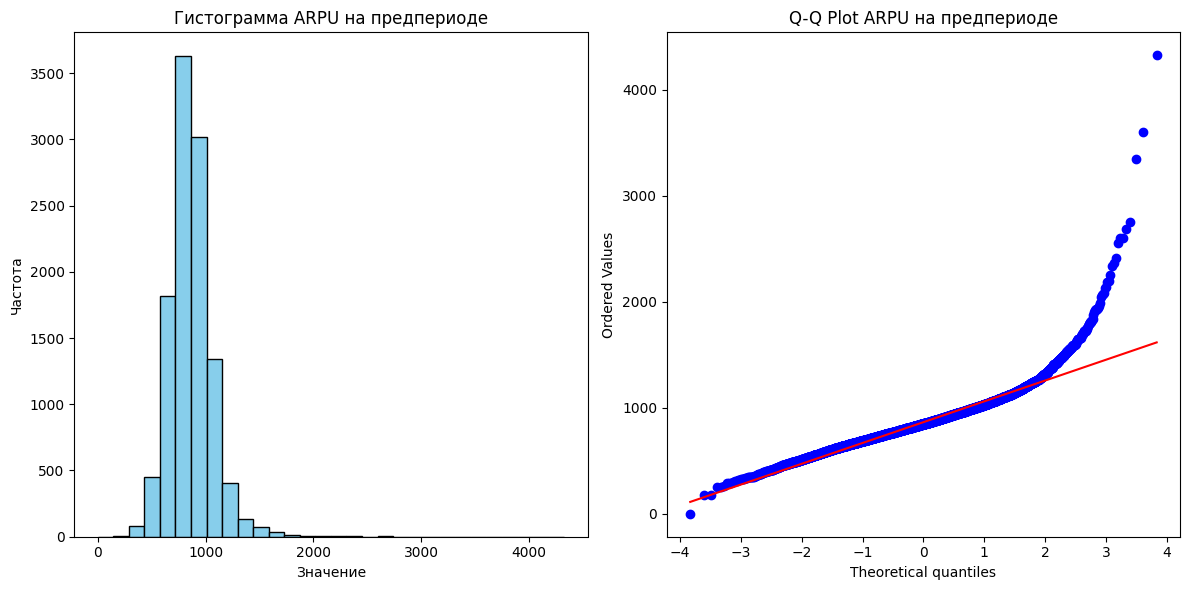

In [82]:
analyze_distribution(AA_data['arpu'], 'ARPU на предпериоде')

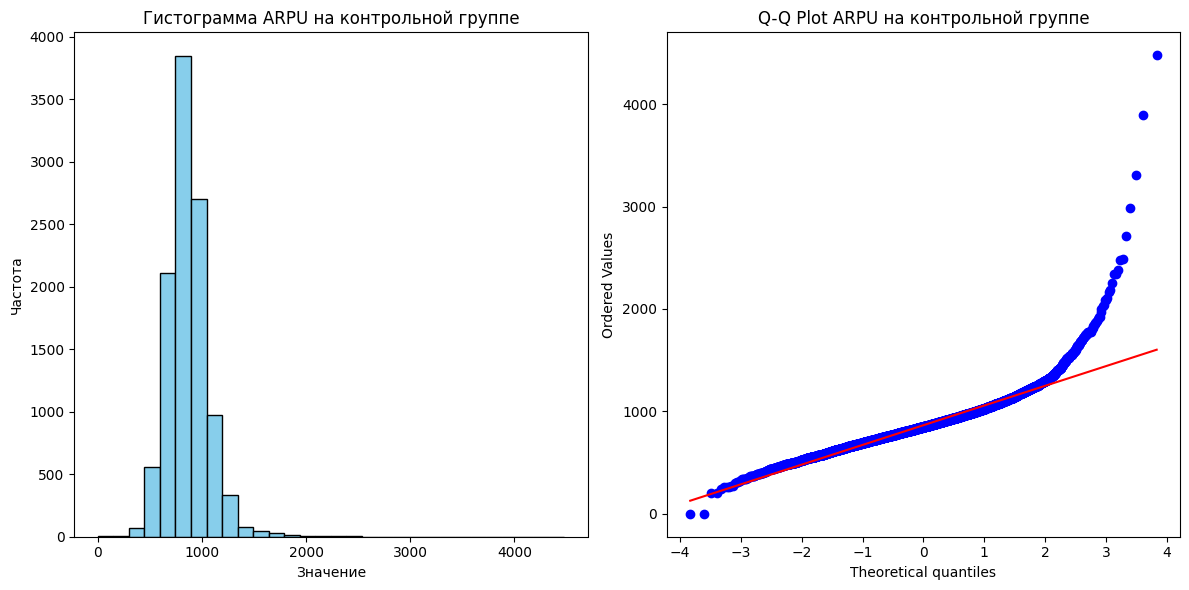

In [83]:
analyze_distribution(control_data['arpu'], 'ARPU на контрольной группе')

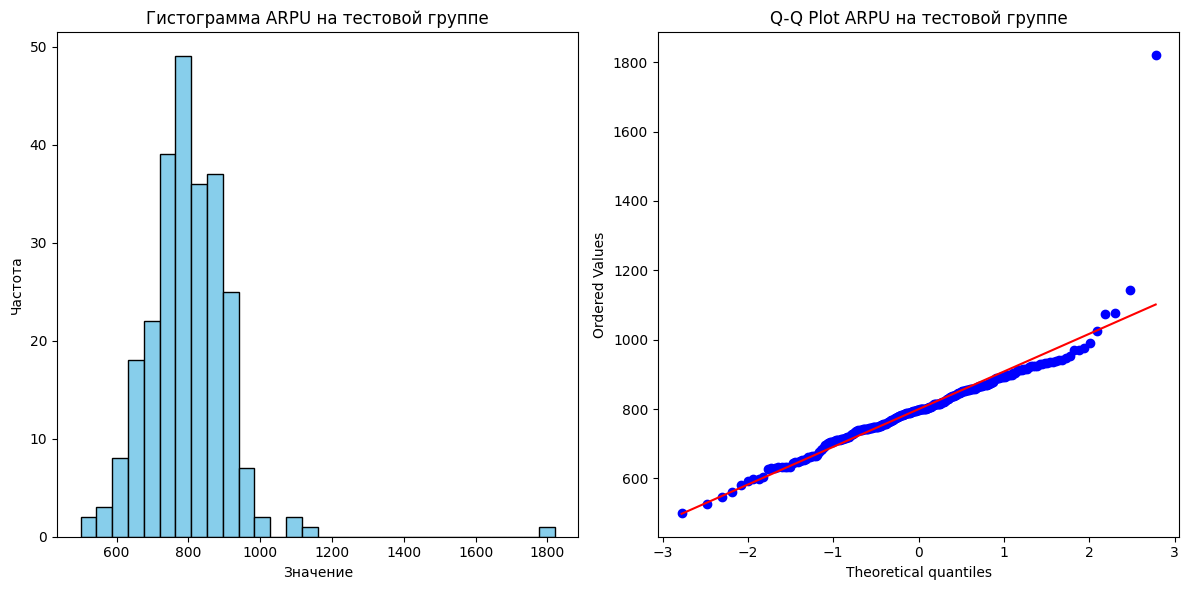

In [84]:
analyze_distribution(test_data['arpu'], 'ARPU на тестовой группе')

По визуальному анализу можно сделать вывод, что данные распределены нормально. Можно применять t-тест.

В тестовой группе есть выброс. Посмотрим на него.

In [85]:
test_data[test_data['arpu'] > 1600]

,date,cityname,ordersource,category,rto,rto_do,cost,qty,tickets,clients_qty,avg_time,avg_price,arpu
396346,2022-05-11 00:00:00+00:00,Курск,web,пицца,50965.32,56254.05,17167.343472,96.0,31.0,28.0,40.0,530.88875,1820.19


Удалим этот выброс из тестовых данных. Вообще надо выяснить, с чем он связан. Возможно, было какое-то мероприятие, например.

In [86]:
test_data = test_data.drop(index=396346)

# 6. Проверка на гомоскедастичность (равенство дисперсий)

In [90]:
    levene_test = stats.levene(test_data['arpu'], control_data['arpu'])  # Выполняем тест Левена
    statistic = levene_test.statistic
    p_value = levene_test.pvalue
    alpha = 0.05

    print("Результаты теста Левена:")
    print(f"Статистика теста: {statistic}")
    print(f"P-значение: {p_value}")

    if p_value > alpha:
        print(f"Дисперсии, вероятно, равны (p > {alpha})")
    else:
        print(f"Дисперсии, вероятно, не равны (p <= {alpha})")

Результаты теста Левена:
Статистика теста: 53.807154018573854
P-значение: 2.3667464171888183e-13
Дисперсии, вероятно, не равны (p <= 0.05)


In [91]:
    levene_test = stats.levene(AA_data['arpu'], control_data['arpu'])  # Выполняем тест Левена
    statistic = levene_test.statistic
    p_value = levene_test.pvalue
    alpha = 0.05

    print("Результаты теста Левена:")
    print(f"Статистика теста: {statistic}")
    print(f"P-значение: {p_value}")

    if p_value > alpha:
        print(f"Дисперсии, вероятно, равны (p > {alpha})")
    else:
        print(f"Дисперсии, вероятно, не равны (p <= {alpha})")

Результаты теста Левена:
Статистика теста: 2.1579964955196815
P-значение: 0.14184392868294587
Дисперсии, вероятно, равны (p > 0.05)


Будем использовать t-критерий Стьюдента для проведения A/A-теста, так как дисперсии контрольной группы и выборки на предпериоде равны, и t-тест Уэлча для сравнения тестовой и контрольной групп, так как у них дисперсии оказались не равны.

# 7. Валидация. A/A-тест

In [93]:
t_test = stats.ttest_ind(control_data['arpu'], AA_data['arpu'])  # t-тест Стьюдента

statistic = t_test.statistic
p_value = t_test.pvalue
alpha = 0.05

print("\nРезультаты t-теста:")
print(f"Статистика теста: {statistic}")
print(f"P-значение: {p_value}")

if p_value > alpha:
    print(f"Не отвергаем нулевую гипотезу (p > {alpha}). Нет статистически значимой разницы между группами.")
else:
    print(f"Отвергаем нулевую гипотезу (p <= {alpha}). Есть статистически значимая разница между группами.")



Результаты t-теста:
Статистика теста: 0.0771426832517276
P-значение: 0.9385107451199671
Не отвергаем нулевую гипотезу (p > 0.05). Нет статистически значимой разницы между группами.


Тест валиден. Можно приступать к A/B-тестированию.

# 8. Расчет результатов A/B-теста

In [94]:
t_test = stats.ttest_ind(test_data['arpu'], control_data['arpu'], equal_var=False)  # t-тест Уэлча

statistic = t_test.statistic
p_value = t_test.pvalue
alpha = 0.05

print("\nРезультаты t-теста:")
print(f"Статистика теста: {statistic}")
print(f"P-значение: {p_value}")

if p_value > alpha:
    print(f"Не отвергаем нулевую гипотезу (p > {alpha}). Нет статистически значимой разницы между группами.")
else:
    print(f"Отвергаем нулевую гипотезу (p <= {alpha}). Есть статистически значимая разница между группами.")


Результаты t-теста:
Статистика теста: -10.636064295479418
P-значение: 1.2091061562637743e-22
Отвергаем нулевую гипотезу (p <= 0.05). Есть статистически значимая разница между группами.


Есть статистически значимая разница между группами. Так как статистика теста отрицательная, изменения скорее всего имели ухудшающий эффект - красный тест. 
Посчитаем d Коэна, чтобы оценить ухудшающий эффект.

In [96]:
import math

nt = test_data['arpu'].count()
nc = control_data['arpu'].count()

SDt = test_data['arpu'].std()
SDc = control_data['arpu'].std()

Mt = test_data['arpu'].mean()
Mc = control_data['arpu'].mean()

SDpooled = math.sqrt(((nt - 1) * SDt**2 + (nc - 1) * SDc**2) / (nt + nc - 2))
d = (Mt - Mc) / SDpooled
d

-0.3456546218127238

d Коэна показал малый размер эффекта. Но всё эе результат теста - красный.

РЕКОМЕНДАЦИИ: не стоит расказывать изменения. Расположение пицц по популярности, а не по увеличению цены значимо ухудшило метрику ARPU, дав малый ухудшающий эффект.